<a href="https://colab.research.google.com/github/PedroIsacS/data_science_aulas/blob/main/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
'https://www.imdb.com/robots.txt'

'https://www.imdb.com/robots.txt'

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#URL para raspar os dados
url = 'https://books.toscrape.com/index.html'

#Fazer a requisição HTTP
response = requests.get(url)

In [9]:
# Usar BeautifulSoup para parsear o conteudo
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
soup.select('article.product_pod')

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">Â£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="th

In [ ]:
#uma lista com vinte livros
len(soup.select('article.product_pod'))

20

In [ ]:
soup.select('article.product_pod')[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">Â£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [ ]:
#caso queira pegar o titulo do livro
soup.select('article.product_pod')[0].h3.a['title']

'A Light in the Attic'

In [ ]:
# pegar o preço
soup.select('article.product_pod')[0].select_one('p.price_color').text

'Â£51.77'

In [ ]:
# pegar se tem no estoque
soup.select('article.product_pod')[0].select_one('p.instock.availability').text.strip()

'In stock'

In [ ]:
star = soup.select('article.product_pod')[0].select_one('p.star-rating')

In [ ]:
star.get('class')[1]

'Three'

In [12]:
def traduzir_numero(numero_em_ingles):
  #dicionario para traduzir os numeros
  traducao = {
      "one": "um",
      "two": "dois",
      "three": "três",
      "four": "quatro",
      "five": "cinco",
  }

  #retorna a tradução ou uma mensagem caso o número não esteja no dicionario
  return traducao.get(numero_em_ingles.lower(), "Número não encontrado")

In [ ]:
traduzir_numero(star.get('class')[1].lower())

'três'

In [10]:
import requests
# URL para raspar os dados
url = 'https://books.toscrape.com/index.html'

# fazer a requisição HTTP
response = requests.get(url)

In [14]:
ls_titulo = []
ls_preco = []
ls_estoque = []
ls_nota = []

for book in soup.select('article.product_pod'):
  ls_titulo.append(book.h3.a['title'])
  ls_preco.append(book.select_one('p.price_color').text)
  ls_estoque.append(book.select_one('p.instock.availability').text.strip())

  # Pegar a estrela
  star = book.select_one('p.star-rating')
  ls_nota.append(traduzir_numero(star.get('class')[1].lower()))

pagina = pd.DataFrame({'Titulo': ls_titulo,
                       'Preço': ls_preco,
                       'Estoque': ls_estoque,
                       'Nota': ls_nota
                       })


In [15]:
pagina

,Titulo,Preço,Estoque,Nota
0,A Light in the Attic,Â£51.77,In stock,três
1,Tipping the Velvet,Â£53.74,In stock,um
2,Soumission,Â£50.10,In stock,um
3,Sharp Objects,Â£47.82,In stock,quatro
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,cinco
5,The Requiem Red,Â£22.65,In stock,um
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,In stock,quatro
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,In stock,três
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,In stock,quatro
9,The Black Maria,Â£52.15,In stock,um


In [16]:
pagina.to_excel('book.xlsx')

In [21]:
#Cada pagina tem 20 livros, precisamos pegar de duas paginas

# URL para raspar os dados
url_base = 'https://books.toscrape.com/catalogue/'

#listas para armazenar dados
ls_titulo = []
ls_preco = []
ls_estoque = []
ls_nota = []

# looping para percorrer todas as paginas
pagina_atual = 1
while True:
  url = f'{url_base}page-{pagina_atual}.html'
  # fazer a requisição HTTP
  response = requests.get(url)

  # Verifica se a página existe
  if response.status_code != 200:
    print(f'Fim das páginas na pagina {pagina_atual}.')
    break

  # Faz a raspagem dos dados
  soup = BeautifulSoup(response.text, 'html.parser')
  for book in soup.select('article.product_pod'):
    ls_titulo.append(book.h3.a['title'])
    ls_preco.append(book.select_one('p.price_color').text)
    ls_estoque.append(book.select_one('p.instock.availability').text.strip())

    # Pegar a estrela
    star = book.select_one('p.star-rating')
    ls_nota.append(traduzir_numero(star.get('class')[1].lower()))

  print(f"Página {pagina_atual} raspada.")
  pagina_atual += 1

# Criar um DataFrame com os dados coletados
pagina = pd.DataFrame({'Titulo': ls_titulo,
                       'Preço': ls_preco,
                       'Estoque': ls_estoque,
                       'Nota': ls_nota
                       })
print(pagina.head())

Página 1 raspada.
Página 2 raspada.
Página 3 raspada.
Página 4 raspada.
Página 5 raspada.
Página 6 raspada.
Página 7 raspada.
Página 8 raspada.
Página 9 raspada.
Página 10 raspada.
Página 11 raspada.
Página 12 raspada.
Página 13 raspada.
Página 14 raspada.
Página 15 raspada.
Página 16 raspada.
Página 17 raspada.
Página 18 raspada.
Página 19 raspada.
Página 20 raspada.
Página 21 raspada.
Página 22 raspada.
Página 23 raspada.
Página 24 raspada.
Página 25 raspada.
Página 26 raspada.
Página 27 raspada.
Página 28 raspada.
Página 29 raspada.
Página 30 raspada.
Página 31 raspada.
Página 32 raspada.
Página 33 raspada.
Página 34 raspada.
Página 35 raspada.
Página 36 raspada.
Página 37 raspada.
Página 38 raspada.
Página 39 raspada.
Página 40 raspada.
Página 41 raspada.
Página 42 raspada.
Página 43 raspada.
Página 44 raspada.
Página 45 raspada.
Página 46 raspada.
Página 47 raspada.
Página 48 raspada.
Página 49 raspada.
Página 50 raspada.
Fim das páginas na pagina 51.
                             

In [22]:
pagina

,Titulo,Preço,Estoque,Nota
0,A Light in the Attic,Â£51.77,In stock,três
1,Tipping the Velvet,Â£53.74,In stock,um
2,Soumission,Â£50.10,In stock,um
3,Sharp Objects,Â£47.82,In stock,quatro
4,Sapiens: A Brief History of Humankind,Â£54.23,In stock,cinco
...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,In stock,um
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,In stock,quatro
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,In stock,cinco
998,1st to Die (Women's Murder Club #1),Â£53.98,In stock,um


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df = pd.read_excel('/content/book.xlsx')

# Tratamento e limpeza de dados

In [26]:
#Limpeza de dados
# 1. Converter a coluna "Preço" de string para float
df['Preço'] = df['Preço'].replace('[£]', '', regex=True).replace('[Â]', '', regex=True).astype(float)

# 2. Converter a coluna "Nota" de texto para valores numéricos
nota_mapa = {'um': 1, 'dois': 2, 'três': 3, 'quatro': 4, 'cinco': 5}
df['Nota'] = df['Nota'].map(nota_mapa)

In [30]:
# Análise estatística
# Média, mediana e desvio padrão dos preços
media_preco = df['Preço'].mean()
mediana_preco = df['Preço'].median()
desvio_preco = df['Preço'].std()

# Preço médio por nota
media_preco_por_nota = df.groupby('Nota')['Preço'].mean()

#Resultados estatísticos
print("Média dos preço: €{:.2f}".format(media_preco))
print("Mediana dos preço: €{:.2f}".format(mediana_preco))
print("Desvio padrão dos preço: €{:.2f}".format(desvio_preco))
print("\nPreço médio por nota:")
print(media_preco_por_nota)


Média dos preço: €38.05
Mediana dos preço: €41.38
Desvio padrão dos preço: €15.14

Preço médio por nota:
Nota
1    40.018333
2    36.830000
3    42.316667
4    31.105000
5    39.750000
Name: Preço, dtype: float64


<ipython-input-31-4c59cd1308c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Nota', y='Preço', data=df, palette='Blues')


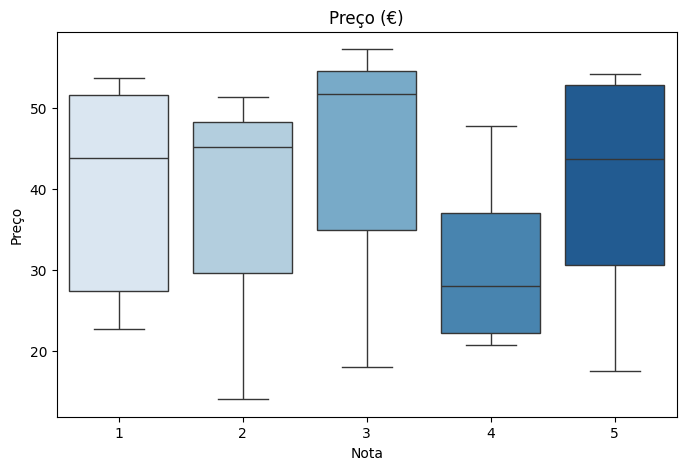

In [31]:
#Visualização 1: relação entre notaas e preços
plt.figure(figsize=(8,5))
sns.boxplot(x='Nota', y='Preço', data=df, palette='Blues')
plt.title('Distribuição de Preços por Nota')
plt.title('Nota (1 a 5)')
plt.title('Preço (€)')
plt.show()